In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X = boston.data
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
X_train.shape, y_train.shape

((379, 13), (379,))

# 모델 학습

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3000, verbose=0)

(0.0, 60.0)

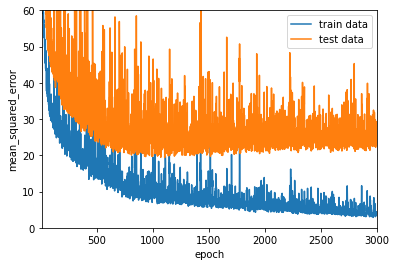

In [9]:
plt.plot(hist.history['loss'], label='train data')
plt.plot(hist.history['val_loss'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.xlim(10, 3000)
plt.ylabel('mean_squared_error')
plt.ylim(0, 60)

# 학습 중단

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
es = EarlyStopping(monitor='val_loss', patience=50)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3000, verbose=1, callbacks=[es])

Epoch 1/3000
12/12 [==============================] - 0s 19ms/step - loss: 22646.5625 - val_loss: 3811.2788
Epoch 2/3000
12/12 [==============================] - 0s 3ms/step - loss: 4732.5400 - val_loss: 1831.8976
Epoch 3/3000
12/12 [==============================] - 0s 3ms/step - loss: 986.6186 - val_loss: 1251.2450
Epoch 4/3000
12/12 [==============================] - 0s 3ms/step - loss: 639.8860 - val_loss: 414.8285
Epoch 5/3000
12/12 [==============================] - 0s 5ms/step - loss: 329.7439 - val_loss: 276.7177
Epoch 6/3000
12/12 [==============================] - 0s 3ms/step - loss: 177.4261 - val_loss: 227.2705
Epoch 7/3000
12/12 [==============================] - 0s 3m

(0.0, 60.0)

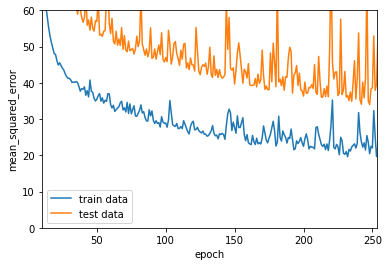

In [13]:
plt.plot(hist.history['loss'], label='train data')
plt.plot(hist.history['val_loss'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.xlim(10, 253)
plt.ylabel('mean_squared_error')
plt.ylim(0, 60)

# 모델 저장

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
model = Sequential()

model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
es = EarlyStopping(monitor='val_loss', patience=50)
mc = ModelCheckpoint(filepath='./model/boston.hdf5', monitor='val_loss', save_best_only=True, verbose=0)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3000, verbose=1, callbacks=[es, mc])

Epoch 1/3000
12/12 [==============================] - 0s 40ms/step - loss: 3022.8240 - val_loss: 518.3178
Epoch 2/3000
12/12 [==============================] - 0s 6ms/step - loss: 540.3198 - val_loss: 364.2187
Epoch 3/3000
12/12 [==============================] - 0s 8ms/step - loss: 244.9463 - val_loss: 196.7480
Epoch 4/3000
12/12 [==============================] - 0s 9ms/step - loss: 183.1828 - val_loss: 151.9217
Epoch 5/3000
12/12 [==============================] - 0s 5ms/step - loss: 135.6701 - val_loss: 161.9158
Epoch 6/3000
12/12 [==============================] - 0s 5ms/step - loss: 108.3409 - val_loss: 118.0609
Epoch 7/3000
12/12 [==============================] - 0s 4ms/step - loss: 90.7963 - val_loss: 164.2624

(0.0, 60.0)

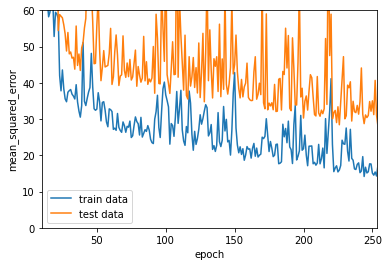

In [18]:
plt.plot(hist.history['loss'], label='train data')
plt.plot(hist.history['val_loss'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.xlim(10, 253)
plt.ylabel('mean_squared_error')
plt.ylim(0, 60)

# 모델 로드

In [19]:
from tensorflow.keras.models import load_model

In [20]:
model2 = load_model('./model/boston.hdf5')

In [21]:
model2.evaluate(X_test, y_test, verbose=0)

21.450002670288086

In [22]:
model2.predict(X_test)

array([[23.592543 ],
       [29.577414 ],
       [26.744486 ],
       [10.415982 ],
       [19.526556 ],
       [20.526602 ],
       [25.38352  ],
       [21.383703 ],
       [18.144613 ],
       [11.89467  ],
       [13.4155855],
       [13.418031 ],
       [17.90042  ],
       [ 8.063802 ],
       [51.410915 ],
       [32.459064 ],
       [26.823034 ],
       [36.23325  ],
       [34.55441  ],
       [23.02593  ],
       [24.601377 ],
       [20.374052 ],
       [19.894514 ],
       [23.942259 ],
       [20.605383 ],
       [19.38112  ],
       [16.85977  ],
       [23.463278 ],
       [34.040325 ],
       [19.259596 ],
       [16.381178 ],
       [20.24732  ],
       [19.164442 ],
       [20.816137 ],
       [26.730192 ],
       [24.57347  ],
       [ 9.6707735],
       [32.48868  ],
       [15.669049 ],
       [13.227368 ],
       [23.781797 ],
       [18.981878 ],
       [19.67034  ],
       [16.451597 ],
       [24.943182 ],
       [24.565828 ],
       [17.363829 ],
       [20.64